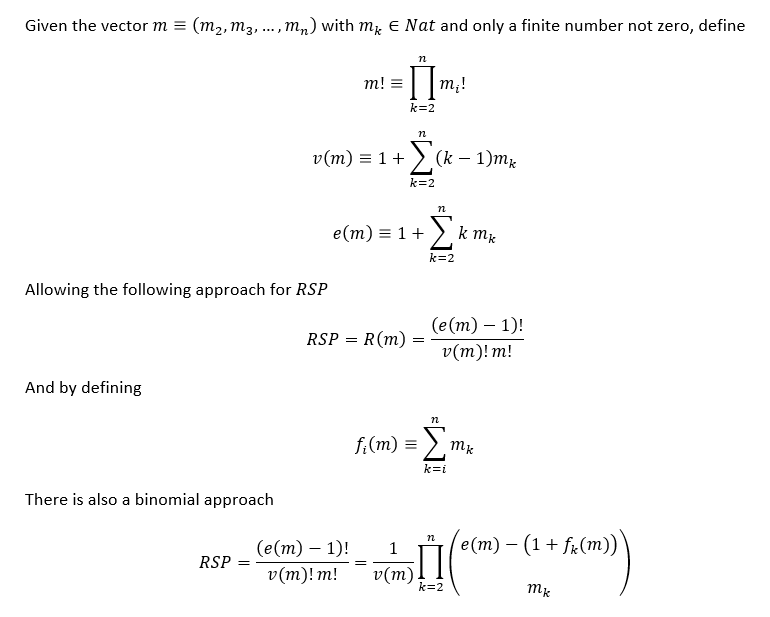

In [1]:
import itertools, time, random
from math import comb
from sympy import *
from IPython.display import display, Markdown, Math
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
def Vertices(*args):
    return 2 + sum([args[i] * (i+1) for i in range(len(args))])

def Faces(*args):
    return sum(args)

def Edges(*args):
    return Vertices(*args) + Faces(*args) - 1

def R(*args): # args =[m_2, m_3, ...]
    # (Edges-1)!/((Edges-(m_2+m_3+m_4))! m_2! m_3! ...)
    vertices = Vertices(*args) # (2+m_2+2m_3+3m_4+...+(n-1)m_n)
    faces = Faces(*args) # (m_2+m_3+m_4+...+m_n)
    edges = vertices + faces - 1 # (1+2m_2+3m_3+4m_4+...+n m_n)
    r = factorial(edges-1)//factorial(edges-faces) # binomial(edges, faces) * (vertices-1)!/edges
    for m in args:
        r //= factorial(m)
    return r


def Binom(*args): # args =[m2, m3, ...]
    vertices = Vertices(*args)
    faces = Faces(*args)
    edges = vertices + faces - 1
    n = edges - 1
    r = 1
    for m in args: 
        r *= comb(n, m)
        n -= m
    r //= vertices - 1
    return r


# small RSP values
for m in [tuple([random.randint(0,10) for k in range(random.randint(0,5))]) for i in range(40)]:
    print('SMALL VALUES: Test passed for m = ', m, ', RSP = ', R(*m), '==', Binom(*m))


n = 100

sample = [tuple([random.randint(0,n+1) for k in range(random.randint(1,n+1))]) for i in range(n+1)]

# chek equivalence
for m in sample: # m allows polygons from 2-gons to 100-gons
    r, b = R(*m), Binom(*m)
    assert(r==b) # stop if values don't match
    # print('BIG VALUES: Test passed for m =',m)

SMALL VALUES: Test passed for m =  (7,) , RSP =  429 == 429
SMALL VALUES: Test passed for m =  () , RSP =  1 == 1
SMALL VALUES: Test passed for m =  (6, 2, 8, 7, 9) , RSP =  683607637860452157525905388321030451761695520000 == 683607637860452157525905388321030451761695520000
SMALL VALUES: Test passed for m =  (9, 7, 5, 0) , RSP =  30978736940584001368800 == 30978736940584001368800
SMALL VALUES: Test passed for m =  () , RSP =  1 == 1
SMALL VALUES: Test passed for m =  (4, 7, 1, 2, 10) , RSP =  1576158526681018355093247688258800 == 1576158526681018355093247688258800
SMALL VALUES: Test passed for m =  (4, 3, 3) , RSP =  4206302100 == 4206302100
SMALL VALUES: Test passed for m =  () , RSP =  1 == 1
SMALL VALUES: Test passed for m =  (1, 9, 0) , RSP =  10015005 == 10015005
SMALL VALUES: Test passed for m =  (1, 3, 8, 2, 7) , RSP =  170747906308270899520995482400 == 170747906308270899520995482400
SMALL VALUES: Test passed for m =  (4, 5, 7) , RSP =  287267751598627800 == 287267751598627800
S

In [3]:
start = time.time()

for m in sample:
    Binom(*m)

stop = time.time()

print('Time using binomial approach: ', stop - start)  


start = time.time()

for m in sample:
    R(*m)

stop = time.time()

print('Time using multinomial approach: ', stop - start) 


Time using binomial approach:  0.17399978637695312
Time using multinomial approach:  53.437044858932495
